In [397]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [398]:
df = pd.read_csv('lasvegas.csv', engine='python')
df.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
0,80.0,0,1,6.355,1.5760,532,30,1,0
1,89.0,1,1,6.875,3.1595,703,30,1,0
2,80.0,1,1,7.080,1.7600,648,30,1,0
3,80.0,0,0,12.855,1.9680,599,30,1,1
4,70.0,1,0,5.760,1.8620,626,30,1,0


In [399]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LVR         1000 non-null   float64
 1   REF         1000 non-null   int64  
 2   INSUR       1000 non-null   int64  
 3   RATE        1000 non-null   float64
 4   AMOUNT      1000 non-null   float64
 5   CREDIT      1000 non-null   int64  
 6   TERM        1000 non-null   int64  
 7   ARM         1000 non-null   int64  
 8   DELINQUENT  1000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


In [400]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
LVR,80.000,89.0000,80.00,80.000,70.000,80.000,80.00,80.000,80.000,63.80,...,80.00,20.00,85.00,65.000,90.000,80.000,20.000,80.000,20.000,88.20
REF,0.000,1.0000,1.00,0.000,1.000,0.000,0.00,1.000,1.000,1.00,...,0.00,0.00,0.00,1.000,1.000,0.000,0.000,0.000,0.000,1.00
INSUR,1.000,1.0000,1.00,0.000,0.000,1.000,0.00,1.000,1.000,1.00,...,0.00,0.00,0.00,1.000,0.000,0.000,0.000,0.000,0.000,0.00
RATE,6.355,6.8750,7.08,12.855,5.760,5.555,7.06,8.355,7.405,5.99,...,6.99,9.94,8.24,6.600,8.650,7.250,10.875,8.720,12.490,7.65
AMOUNT,1.576,3.1595,1.76,1.968,1.862,2.080,1.80,1.376,1.320,2.52,...,1.60,0.40,2.38,3.224,2.385,1.948,0.487,1.808,0.452,2.91
CREDIT,532.000,703.0000,648.00,599.000,626.000,742.000,707.00,517.000,622.000,544.00,...,698.00,698.00,569.00,512.000,527.000,624.000,624.000,638.000,638.000,624.00
TERM,30.000,30.0000,30.00,30.000,30.000,30.000,30.00,30.000,30.000,30.00,...,30.00,15.00,30.00,30.000,30.000,30.000,30.000,30.000,30.000,30.00
ARM,1.000,1.0000,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.00,...,1.00,0.00,1.00,1.000,1.000,1.000,0.000,1.000,0.000,1.00
DELINQUENT,0.000,0.0000,0.00,1.000,0.000,0.000,1.00,0.000,0.000,0.00,...,0.00,0.00,0.00,0.000,0.000,1.000,1.000,0.000,0.000,0.00


In [401]:
df.describe(include='all')

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.589300,0.576000,0.720000,7.939915,1.757963,622.069000,28.125000,0.716000,0.199000
std,23.307336,0.494438,0.449224,1.721108,1.012117,59.527925,4.825211,0.451162,0.399448
min,5.000000,0.000000,0.000000,4.750000,0.073500,445.000000,10.000000,0.000000,0.000000
25%,67.900000,0.000000,0.000000,6.750000,1.142750,583.000000,30.000000,0.000000,0.000000
50%,80.000000,1.000000,1.000000,7.500000,1.630500,623.000000,30.000000,1.000000,0.000000
75%,84.725000,1.000000,1.000000,8.662500,2.177900,658.250000,30.000000,1.000000,0.000000
max,99.700000,1.000000,1.000000,14.599000,8.666500,809.000000,30.000000,1.000000,1.000000


In [402]:
loan = pd.read_csv('loan.csv')

In [403]:
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,url
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,NaN
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,NaN
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,NaN
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,NaN
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,NaN


In [404]:
# loan = loan.drop('url',axis=1)

<Axes: xlabel='loan_amnt', ylabel='annual_inc'>

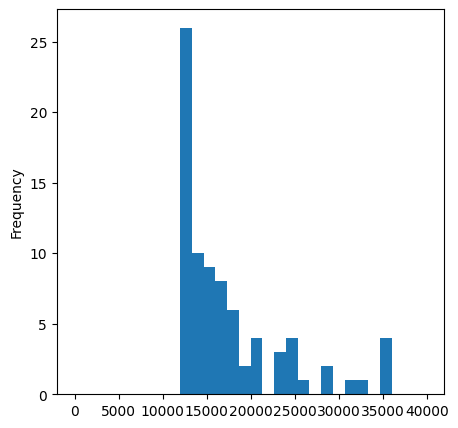

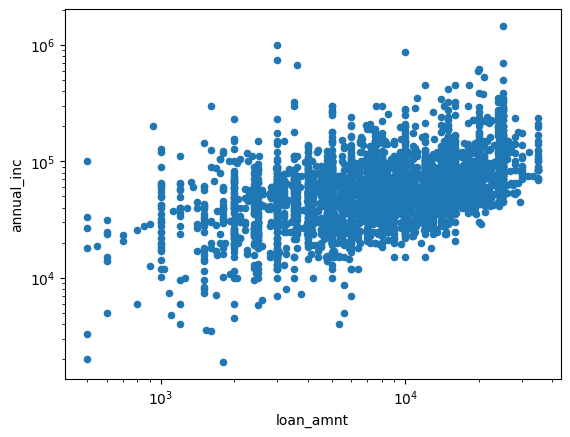

In [405]:
## 데이터 혹은 변수명.plot(kind=line(Default), bar, barh, hist, box, density, pie, area, scatter, kde)
# loan.loan_amnt.plot(kind = 'hist', figsize=(10,10), bins=30, range=(0,40000))

## 대출 금액이 $12.00 이상, 대출 등급이 A인 대출 건수를 출력
sub = loan[(loan.grade == 'A') & (loan.loan_amnt>=12000)]
sub.loan_amnt.plot(kind ='hist', figsize=(5,5), bins=30, range=(0,40000))

loan.plot(kind='scatter', x = 'loan_amnt', y = 'annual_inc', logy=True, logx=True)

In [406]:
pd.crosstab(loan.grade, loan.home_ownership, normalize=True, margins=True)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,0.037077,0.001067,0.000267,0.005068,0.036543,0.080021
B,0.077621,0.000000,0.001067,0.012003,0.098160,0.188850
C,0.095492,0.000000,0.002134,0.016804,0.108562,0.222993
D,0.089357,0.000000,0.002401,0.016538,0.113097,0.221392
E,0.066151,0.000000,0.001867,0.012803,0.081355,0.162177
F,0.030408,0.000267,0.000533,0.003201,0.037077,0.071486
G,0.026407,0.000000,0.001867,0.003468,0.021339,0.053081
All,0.422513,0.001334,0.010136,0.069885,0.496132,1.000000


In [407]:
cross_tab = pd.crosstab([loan.grade, loan.sub_grade], loan.term)
cross_tab

term              36 months   60 months
grade sub_grade                        
A     A1                 30           0
      A2                 40           0
      A3                 45           0
      A4                 75           4
      A5                102           4
B     B1                118           5
      B2                107           6
      B3                138          19
      B4                135          15
      B5                135          30
C     C1                157          24
      C2                172          23
      C3                141          22
      C4                151          15
      C5                117          14
D     D1                148           2
      D2                138          39
      D3                142          37
      D4                139          34
      D5                123          28
E     E1                 94          31
      E2                110          43
      E3                 91          36
      E4                 80          28
      E5                 68          27
F     F1                 51          20
      F2                 50          14
      F3                 41          11
      F4                 31          12
      F5                 30           8
G     G1                 27          10
      G2                 22           8
      G3                 25           6
      G4                 39           6
      G5                 51           5

In [408]:
# digitize

d = np.linspace(500,15000,5)
loan['loan_amnt_group'] = np.digitize(loan['loan_amnt'],d)
loan

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,url,loan_amnt_group
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,NaN,2
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,NaN,1
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,NaN,1
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,NaN,3
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,NaN,5000.0,5000.0,36 months,7.75%,156.11,A,A3,MORTGAGE,70000.0,07-Jun,Does not meet the credit policy. Status:Fully ...,NaN,2
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [409]:
loan.groupby('loan_amnt_group').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_amnt_group,,,,,,,,
1,737.0,2697.862958,946.298215,500.0,2000.0,3000.0,3500.0,4100.0
2,989.0,5870.298281,1001.396109,4125.0,5000.0,6000.0,7000.0,7700.0
3,744.0,9375.638441,969.202105,7750.0,8400.0,9887.5,10000.0,11325.0
4,420.0,12766.547619,962.758187,11400.0,12000.0,12250.0,13800.0,14725.0
5,859.0,20284.778813,4716.249140,15000.0,16000.0,20000.0,24000.0,35000.0


In [ ]:
loan['term'] = loan['term'].astype(str)
loan['grade'] = loan['grade'].astype(str)
loan['term'] = loan['term'].replace('nan', np.nan)
loan['grade'] = loan['grade'].replace('nan', np.nan)
loan['term'] = loan['term'].str.strip()


# loan.info()

In [ ]:
loan.info()

In [ ]:
# print(loan['term'].unique())
# print(loan['grade'].unique())


In [ ]:
loan.groupby(['term','grade']).mean()['annual_inc']

In [ ]:
loan.groupby(['term','grade']).mean('annual_inc')['annual_inc']

In [ ]:
loan.groupby(['term','grade'])['annual_inc'].mean()


In [ ]:
loan.corr()

In [ ]:
loan.loan_amnt.corr(loan.installment)

In [ ]:
df = pd.DataFrame(
    {"A": [1, 1, 2, 1, 2], "B": [np.nan, 2, 3, 4, 5], "C": [1, 2, 1, 1, 2]},
    columns=["A", "B", "C"],
)

In [ ]:
df.groupby('A').mean()

In [ ]:
df.groupby(['A', 'B']).mean()

In [ ]:
df.groupby('A')['B'].mean()